Transform length: 256


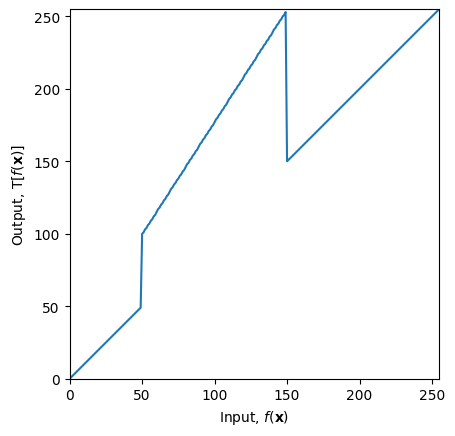

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Define the intensity ranges based on control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      # From 0 to 50
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  # From 50 to 100
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  # From 100 to 150
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  # From 150 to 200
t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  # From 200 to 255

# Concatenate the transformation arrays
transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
print(f'Transform length: {len(transform)}')

# Plot the transformation curve
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')  # Use raw string literals for LaTeX-style math
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')  # Correct the backslashes
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.show()

# Load the original image
img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

cv.imshow("Original Image", img_orig)
cv.waitKey(0)

# Apply intensity windowing transformation
image_transformed = cv.LUT(img_orig, transform)

# Show transformed image
cv.imshow("Transformed Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

Transform length: 256


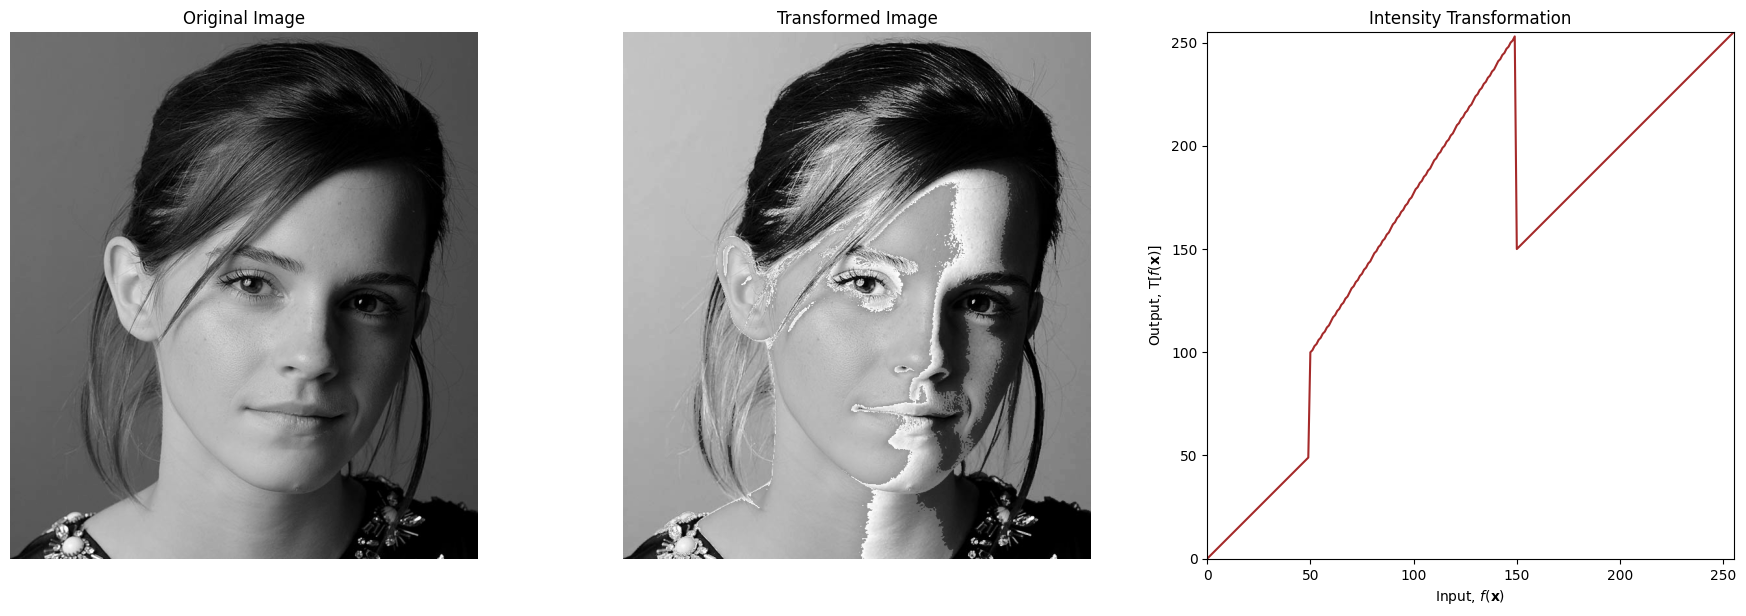

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Define the intensity ranges based on control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      # From 0 to 50
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  # From 50 to 100
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  # From 100 to 150
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  # From 150 to 200
t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  # From 200 to 255

# Concatenate the transformation arrays
transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
print(f'Transform length: {len(transform)}')

# Load the original image
img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply intensity windowing transformation
image_transformed = cv.LUT(img_orig, transform)

# Display using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the original image
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')  # Turn off axis labels

# Plot the transformed image
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')  # Turn off axis labels

# Plot the transformation curve
ax[2].plot(transform, color='brown')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')  # Use raw string literals for LaTeX-style math
ax[2].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')  # Correct the backslashes
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_aspect('equal')
ax[2].set_title('Intensity Transformation')

# Adjust layout and display
plt.tight_layout()
plt.show()


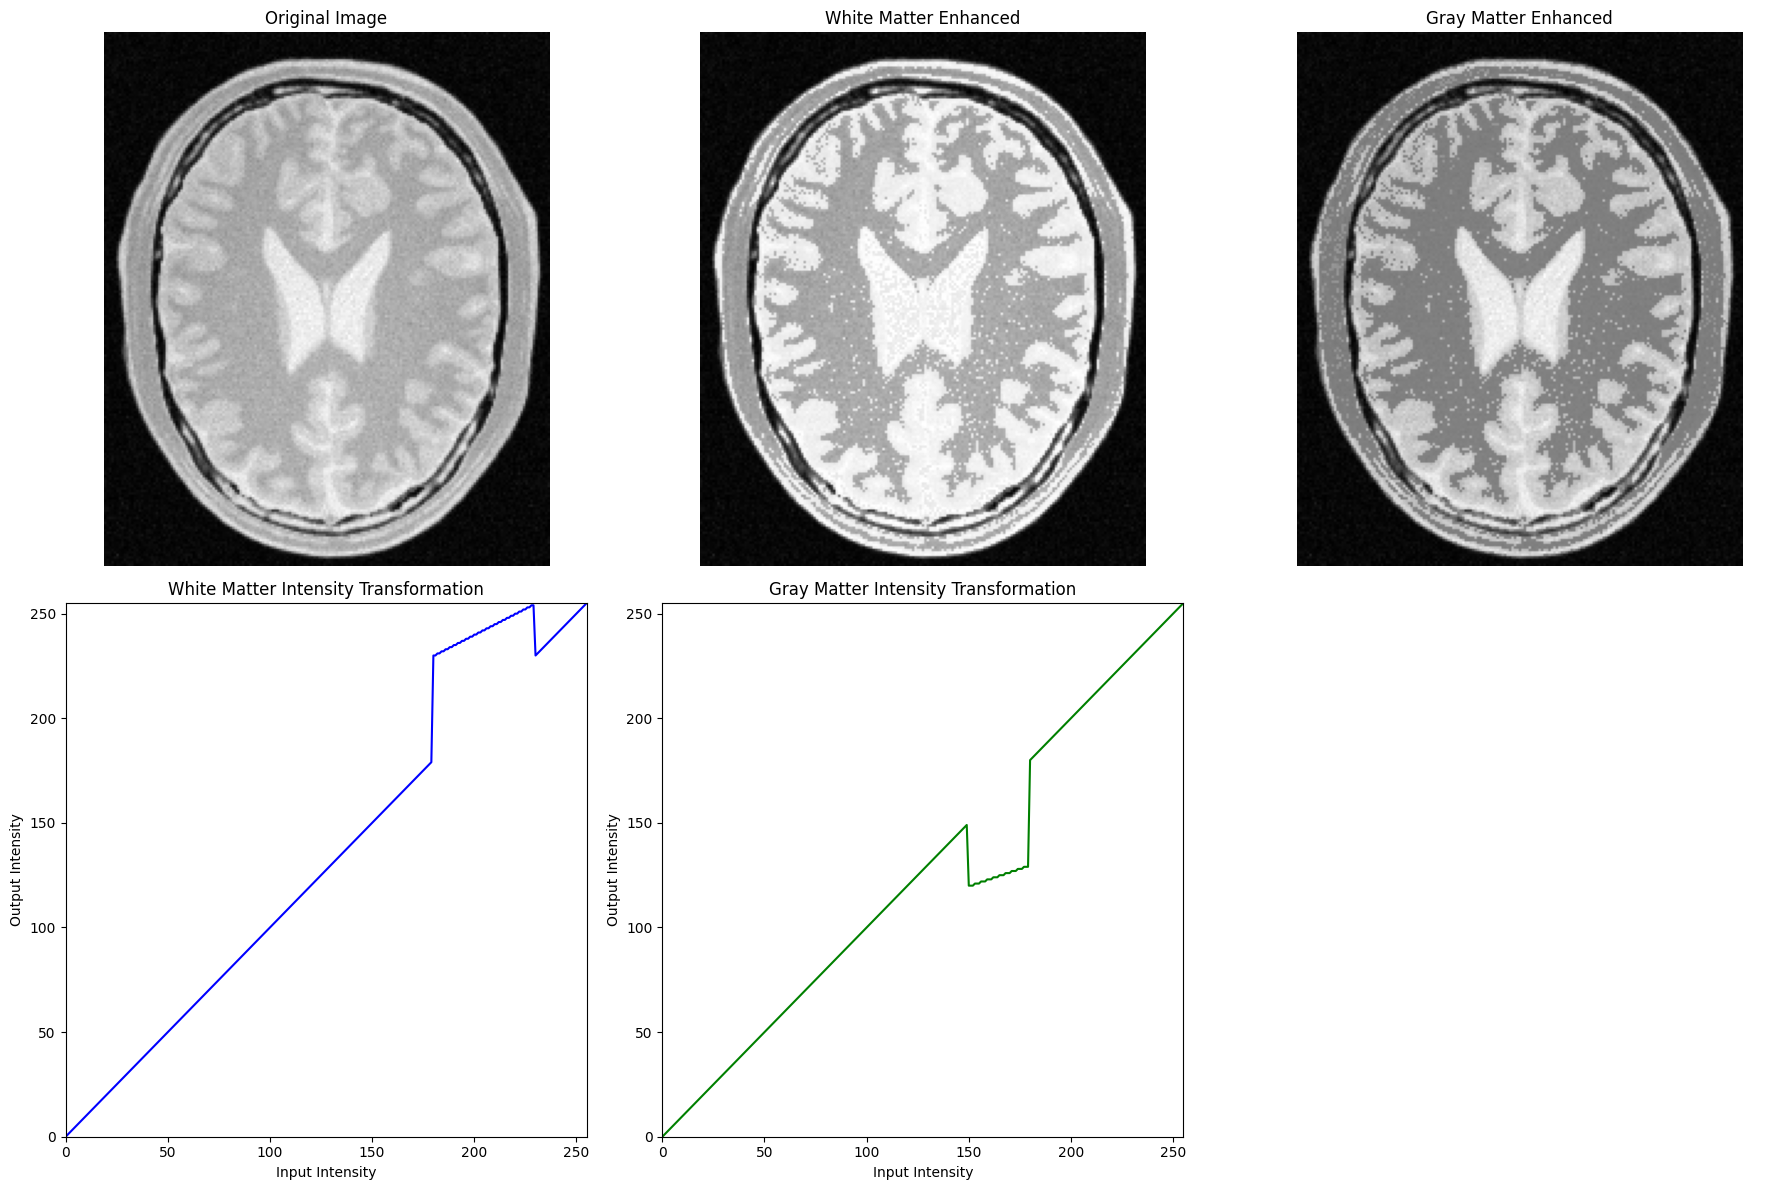

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain image
brain_img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Define control points for white matter transformation
c_white_matter = np.array([(180, 180), (180, 230), (230, 255), (230, 230), (255, 255)])
x= 60+90
y = 120
z = 100+80

# Define control points for gray matter transformation
c_gray_matter = np.array([(x, x), (x, y), (z, 130), (z, z), (255, 255)])

# Function to create intensity transformation based on control points
def create_intensity_transform(c):
    t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      
    t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  
    t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  
    t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  
    t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  
    
    # Concatenate the transformation arrays
    transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
    return transform

# Create intensity transformations
transform_white = create_intensity_transform(c_white_matter)
transform_gray = create_intensity_transform(c_gray_matter)

# Apply intensity windowing transformations
image_white_matter = cv.LUT(brain_img, transform_white)
image_gray_matter = cv.LUT(brain_img, transform_gray)

# Plot the original image, white matter enhanced, and gray matter enhanced images
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Original image
ax[0, 0].imshow(brain_img, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# White matter enhanced image
ax[0, 1].imshow(image_white_matter, cmap='gray')
ax[0, 1].set_title('White Matter Enhanced')
ax[0, 1].axis('off')

# Gray matter enhanced image
ax[0, 2].imshow(image_gray_matter, cmap='gray')
ax[0, 2].set_title('Gray Matter Enhanced')
ax[0, 2].axis('off')

# Plot intensity transformation for white matter
ax[1, 0].plot(transform_white, color='blue')
ax[1, 0].set_title('White Matter Intensity Transformation')
ax[1, 0].set_xlim(0, 255)
ax[1, 0].set_ylim(0, 255)
ax[1, 0].set_xlabel('Input Intensity')
ax[1, 0].set_ylabel('Output Intensity')

# Plot intensity transformation for gray matter
ax[1, 1].plot(transform_gray, color='green')
ax[1, 1].set_title('Gray Matter Intensity Transformation')
ax[1, 1].set_xlim(0, 255)
ax[1, 1].set_ylim(0, 255)
ax[1, 1].set_xlabel('Input Intensity')
ax[1, 1].set_ylabel('Output Intensity')

# Hide the last plot
ax[1, 2].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

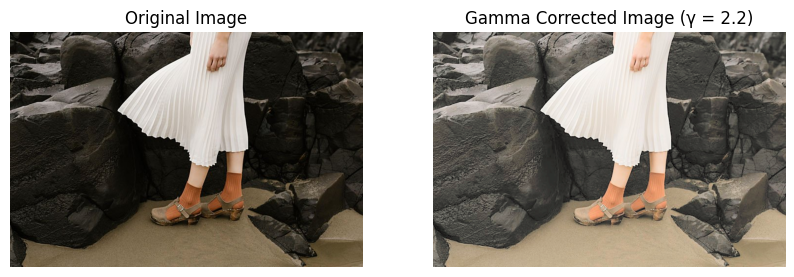

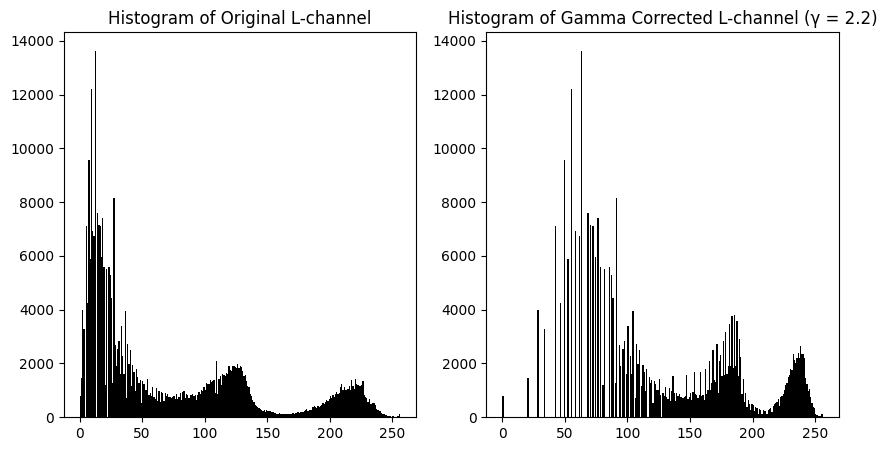

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r'a1images\highlights_and_shadows.jpg')

# Convert the image from BGR (OpenCV default) to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into L, A, and B channels
L, A, B = cv2.split(lab_image)

# Apply gamma correction to the L-channel
gamma = 2.2  # You can change the gamma value to see different results
L_corrected = np.array(255 * (L / 255) ** (1 / gamma), dtype='uint8')

# Merge the corrected L-channel back with A and B channels
lab_corrected = cv2.merge([L_corrected, A, B])

# Convert LAB back to BGR color space
image_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)

# Plot original and gamma corrected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_corrected, cv2.COLOR_BGR2RGB))
plt.title(f'Gamma Corrected Image (γ = {gamma})')
plt.axis('off')

# Show histograms of the L-channel before and after correction
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), 256, [0, 256], color='black')
plt.title('Histogram of Original L-channel')

plt.subplot(1, 2, 2)
plt.hist(L_corrected.ravel(), 256, [0, 256], color='black')
plt.title(f'Histogram of Gamma Corrected L-channel (γ = {gamma})')

plt.show()

C:\Users\Kiru\AppData\Local\Temp\ipykernel_14144\4005301683.py:12: RuntimeWarning: overflow encountered in scalar subtract
  transformed_saturation[i, j] = min(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)
C:\Users\Kiru\AppData\Local\Temp\ipykernel_14144\4005301683.py:12: RuntimeWarning: overflow encountered in scalar negative
  transformed_saturation[i, j] = min(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)


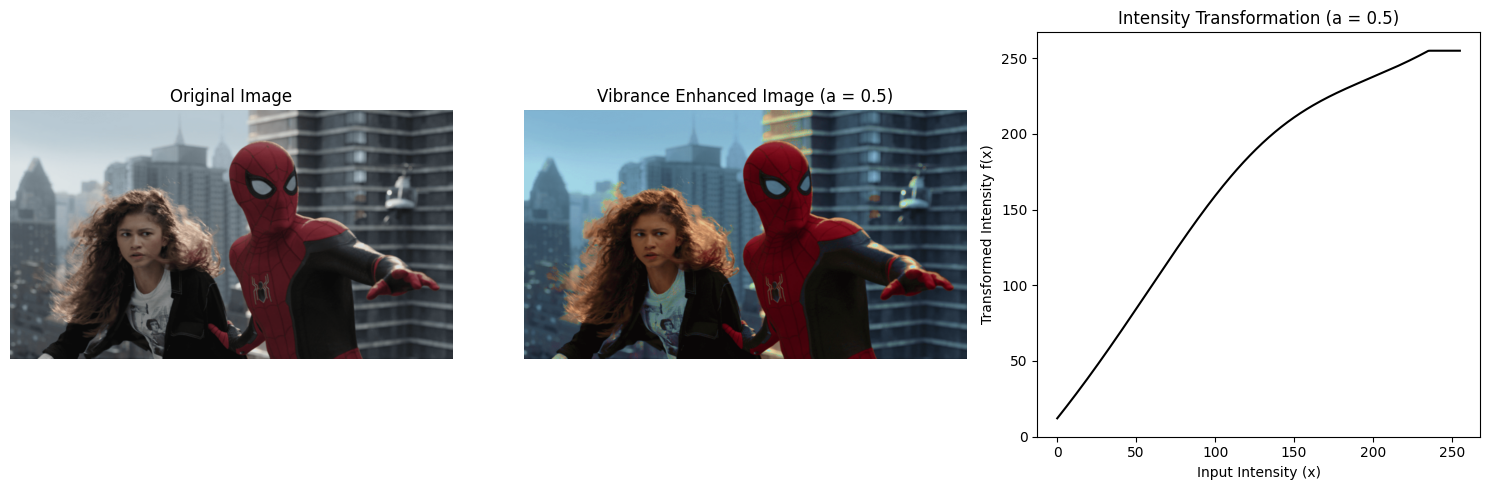

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply intensity transformation to saturation plane
def intensity_transformation(saturation, a=0.5, sigma=70):
    transformed_saturation = np.zeros_like(saturation, dtype=np.float32)
    
    for i in range(saturation.shape[0]):
        for j in range(saturation.shape[1]):
            x = saturation[i, j]
            transformed_saturation[i, j] = min(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)
    
    return np.uint8(transformed_saturation)

# Load the image
image = cv2.imread('a1images/spider.png')

# Convert the image from BGR to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split into Hue, Saturation, and Value planes
hue, saturation, value = cv2.split(hsv_image)

# Apply intensity transformation to the saturation plane
a = 0.5
saturation_transformed = intensity_transformation(saturation, a=a)

# Recombine the Hue, transformed Saturation, and Value planes
hsv_transformed = cv2.merge([hue, saturation_transformed, value])

# Convert the HSV image back to BGR color space
image_vibrance_enhanced = cv2.cvtColor(hsv_transformed, cv2.COLOR_HSV2BGR)

# Display the original and vibrance-enhanced images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Vibrance-enhanced image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_vibrance_enhanced, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = {a})')
plt.axis('off')

# Intensity transformation
x_vals = np.arange(0, 256, 1)
y_vals = [min(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * 70 ** 2)), 255) for x in x_vals]

plt.subplot(1, 3, 3)
plt.plot(x_vals, y_vals, color='black')
plt.title(f'Intensity Transformation (a = {a})')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Transformed Intensity f(x)')

plt.tight_layout()
plt.show()

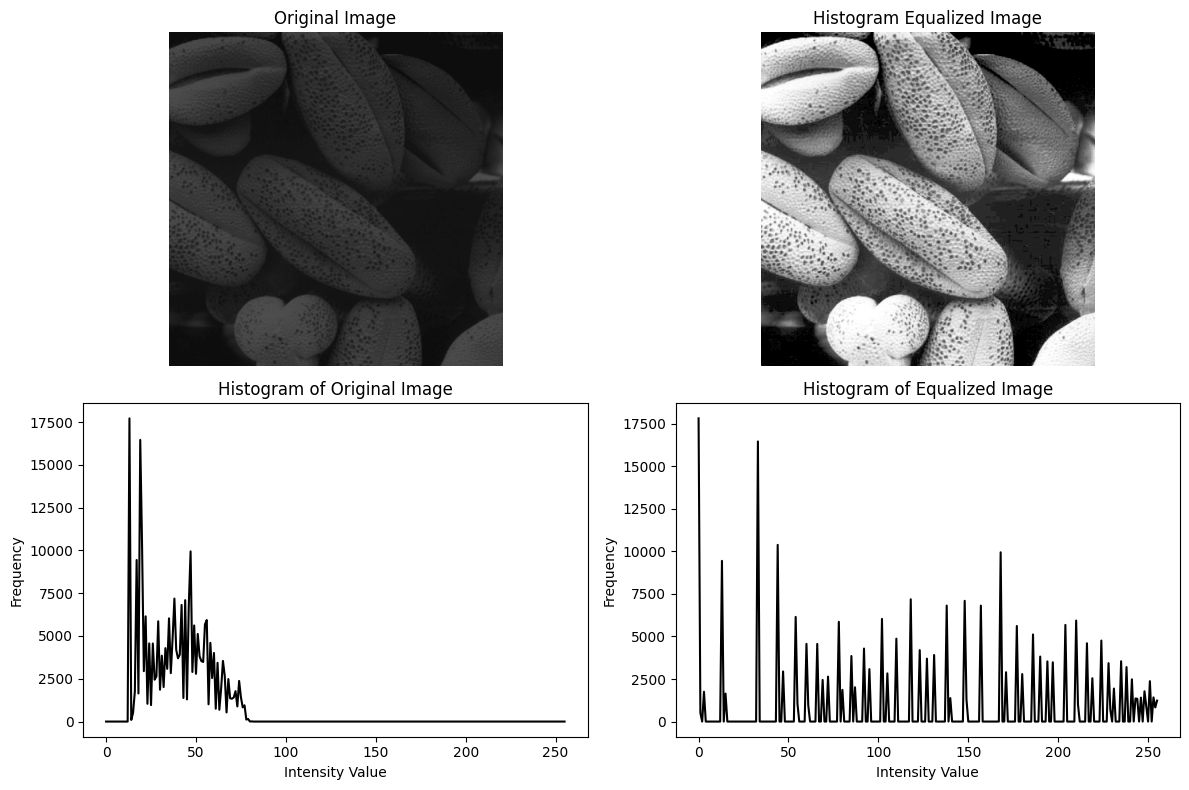

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
f = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)

# Perform histogram equalization using OpenCV
f_equalized = cv.equalizeHist(f)

# Compute histograms for original and equalized images
hist_orig = cv.calcHist([f], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([f_equalized], [0], None, [256], [0, 256])

# Plot original image, equalized image, and their histograms
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Display the original image
ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Display the histogram equalized image
ax[0, 1].imshow(f_equalized, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Histogram Equalized Image')
ax[0, 1].axis('off')

# Plot the histogram of the original image
ax[1, 0].plot(hist_orig, color='black')
ax[1, 0].set_title('Histogram of Original Image')
ax[1, 0].set_xlabel('Intensity Value')
ax[1, 0].set_ylabel('Frequency')

# Plot the histogram of the equalized image
ax[1, 1].plot(hist_equalized, color='black')
ax[1, 1].set_title('Histogram of Equalized Image')
ax[1, 1].set_xlabel('Intensity Value')
ax[1, 1].set_ylabel('Frequency')

# Adjust the layout for better display
plt.tight_layout()
plt.show()

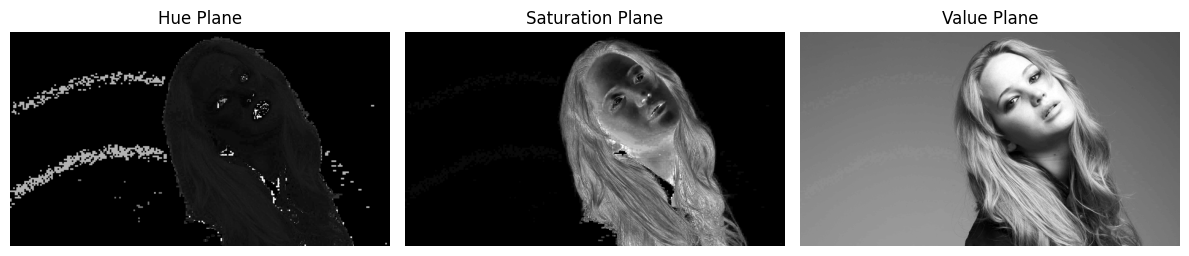

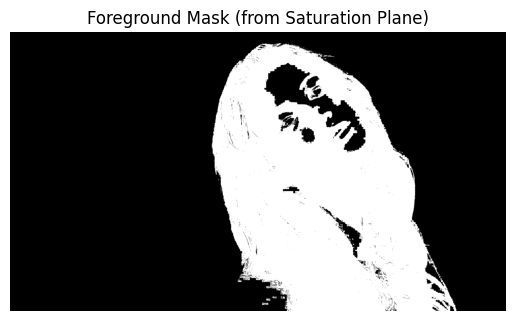

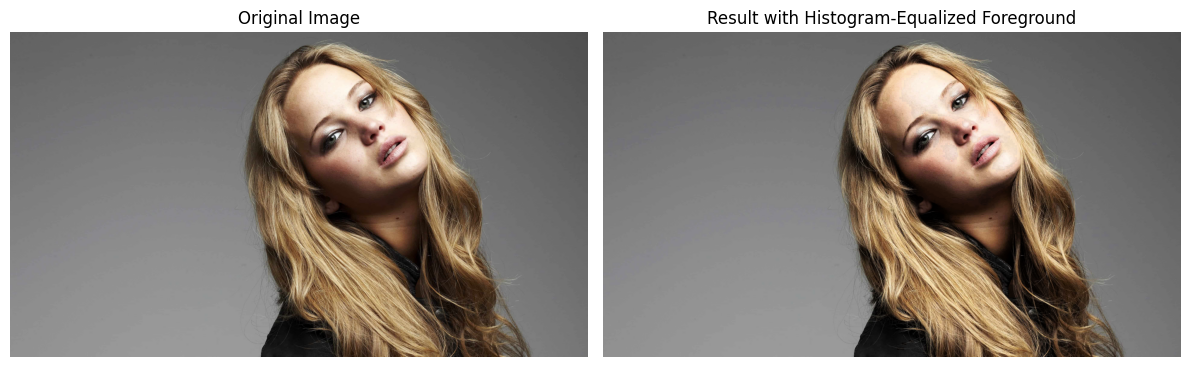

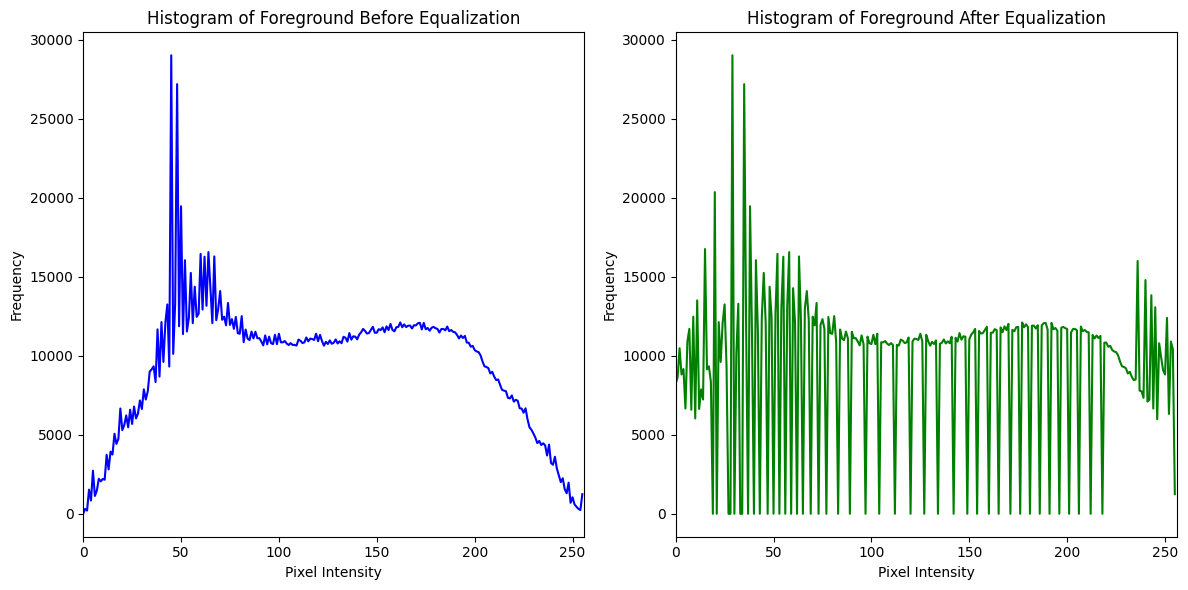

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Open the image and convert to HSV, then split into H, S, and V planes
img = cv.imread('a1images/jeniffer.jpg')
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split into hue, saturation, and value planes
hue, saturation, value = cv.split(hsv_img)

# Display H, S, and V planes
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title('Hue Plane')
ax[0].axis('off')

ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation Plane')
ax[1].axis('off')

ax[2].imshow(value, cmap='gray')
ax[2].set_title('Value Plane')
ax[2].axis('off')

plt.tight_layout()
plt.show()

# Threshold the Saturation plane to create a binary mask for the foreground
_, mask = cv.threshold(saturation, 50, 255, cv.THRESH_BINARY)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask (from Saturation Plane)')
plt.axis('off')
plt.show()

# Extract the foreground using cv.bitwise_and and compute the histogram
foreground = cv.bitwise_and(value, value, mask=mask)

# Compute histogram for the foreground before equalization
hist_foreground_before = cv.calcHist([foreground], [0], mask, [256], [0, 256])

# Obtain the cumulative sum of the histogram
cdf = np.cumsum(hist_foreground_before)

# Normalize the CDF
cdf_min = cdf[cdf > 0].min()
cdf = (cdf - cdf_min) / (cdf.max() - cdf_min) * 255
cdf = cdf.astype(np.uint8)

# Apply histogram equalization to the foreground
foreground_equalized = cdf[foreground]

# Extract the background
background = cv.bitwise_and(value, value, mask=cv.bitwise_not(mask))

# Add the histogram-equalized foreground back to the background
final_value = cv.add(foreground_equalized, background)

# Recombine the H, S, and equalized V planes to get the final image
final_hsv = cv.merge([hue, saturation, final_value])
final_img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)

# Display the original image and the final result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(final_img, cv.COLOR_BGR2RGB))
ax[1].set_title('Result with Histogram-Equalized Foreground')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Compute histograms of foreground before and after equalization
hist_foreground_after = cv.calcHist([foreground_equalized], [0], mask, [256], [0, 256])

# Plot the histograms of foreground before and after equalization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(hist_foreground_before, color='blue')
ax[0].set_title('Histogram of Foreground Before Equalization')
ax[0].set_xlim([0, 256])
ax[0].set_xlabel('Pixel Intensity')
ax[0].set_ylabel('Frequency')

ax[1].plot(hist_foreground_after, color='green')
ax[1].set_title('Histogram of Foreground After Equalization')
ax[1].set_xlim([0, 256])
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


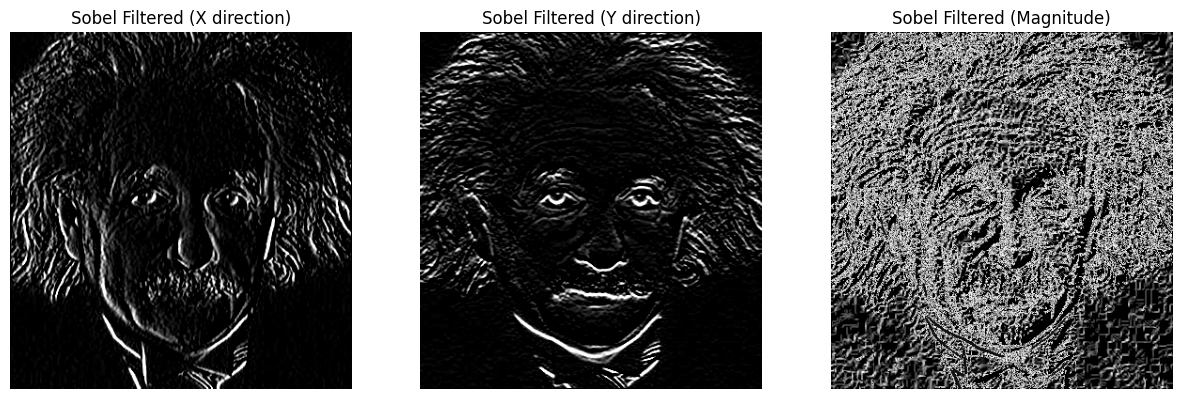

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Sobel kernel for x direction
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Sobel kernel for y direction
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply Sobel filter in x direction using filter2D
sobel_filtered_x = cv.filter2D(img, -1, sobel_x)

# Apply Sobel filter in y direction using filter2D
sobel_filtered_y = cv.filter2D(img, -1, sobel_y)

# Magnitude of Sobel filter (gradient magnitude)
sobel_filtered = np.sqrt(sobel_filtered_x**2 + sobel_filtered_y**2)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sobel_filtered_x, cmap='gray')
ax[0].set_title('Sobel Filtered (X direction)')
ax[0].axis('off')

ax[1].imshow(sobel_filtered_y, cmap='gray')
ax[1].set_title('Sobel Filtered (Y direction)')
ax[1].axis('off')

ax[2].imshow(sobel_filtered, cmap='gray')
ax[2].set_title('Sobel Filtered (Magnitude)')
ax[2].axis('off')

plt.show()

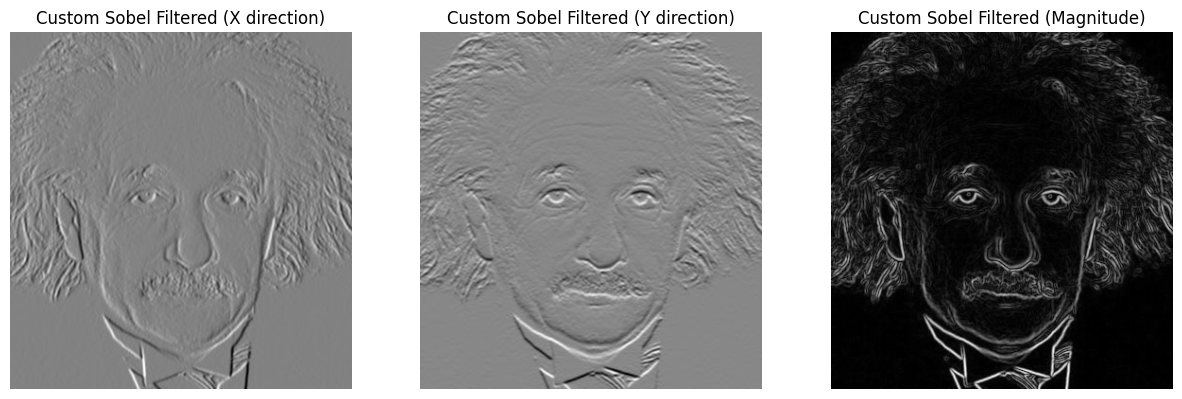

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Custom convolution function
def apply_convolution(img, kernel):
    M, N = img.shape
    k, l = kernel.shape
    output = np.zeros((M-k+1, N-l+1))

    # Convolution operation
    for i in range(M - k + 1):
        for j in range(N - l + 1):
            output[i, j] = np.sum(img[i:i+k, j:j+l] * kernel)
    
    return output

# Read image
img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Apply custom Sobel filter using the convolution function
sobel_filtered_x_custom = apply_convolution(img, sobel_x)
sobel_filtered_y_custom = apply_convolution(img, sobel_y)

# Magnitude of Sobel filter (custom)
sobel_filtered_custom = np.sqrt(sobel_filtered_x_custom**2 + sobel_filtered_y_custom**2)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sobel_filtered_x_custom, cmap='gray')
ax[0].set_title('Custom Sobel Filtered (X direction)')
ax[0].axis('off')

ax[1].imshow(sobel_filtered_y_custom, cmap='gray')
ax[1].set_title('Custom Sobel Filtered (Y direction)')
ax[1].axis('off')

ax[2].imshow(sobel_filtered_custom, cmap='gray')
ax[2].set_title('Custom Sobel Filtered (Magnitude)')
ax[2].axis('off')

plt.show()

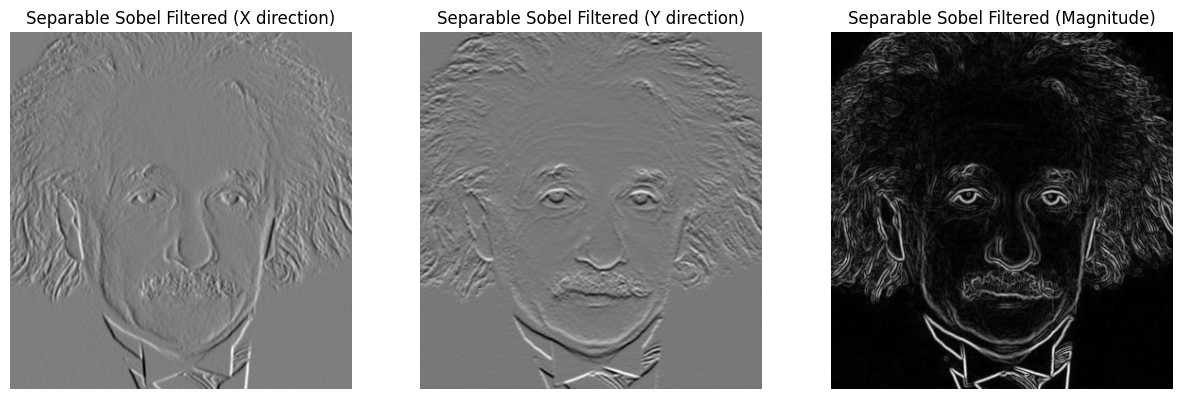

In [10]:
# Separable Sobel filters
vertical_filter = np.array([[1], [2], [1]])  # Vertical filter
horizontal_filter = np.array([[1, 0, -1]])  # Horizontal filter

# Apply the separable filters in both x and y directions
filtered_x = apply_convolution(img, vertical_filter)
filtered_x = apply_convolution(filtered_x, horizontal_filter)

filtered_y = apply_convolution(img, horizontal_filter.T)
filtered_y = apply_convolution(filtered_y, vertical_filter.T)

# Magnitude of the Sobel filter
sobel_separable_magnitude = np.sqrt(filtered_x**2 + filtered_y**2)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(filtered_x, cmap='gray')
ax[0].set_title('Separable Sobel Filtered (X direction)')
ax[0].axis('off')

ax[1].imshow(filtered_y, cmap='gray')
ax[1].set_title('Separable Sobel Filtered (Y direction)')
ax[1].axis('off')

ax[2].imshow(sobel_separable_magnitude, cmap='gray')
ax[2].set_title('Separable Sobel Filtered (Magnitude)')
ax[2].axis('off')

plt.show()

Normalized SSD (Nearest Neighbor): 26.446071759259258
Normalized SSD (Bilinear): 18.34591087962963


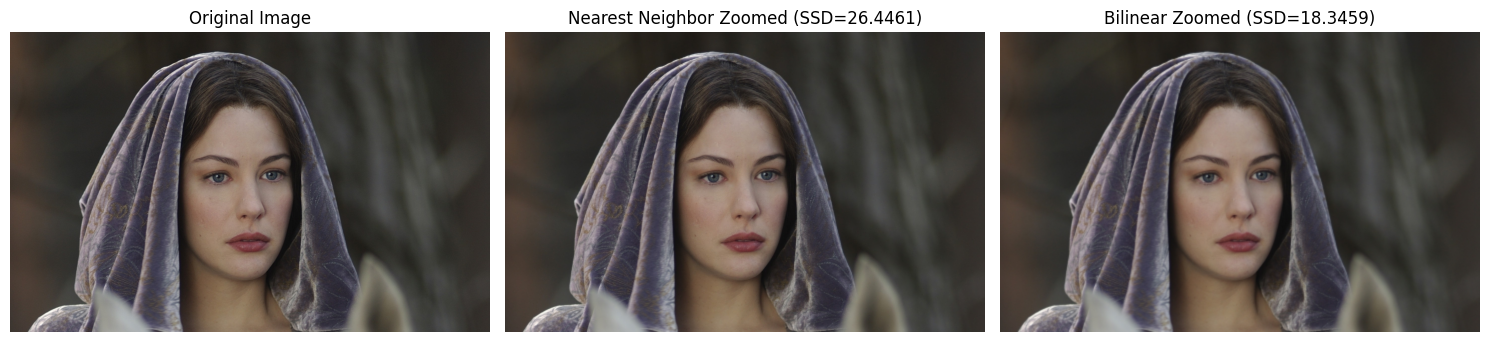

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to zoom the image using nearest-neighbor or bilinear interpolation
def zoom_image(image, scale, interpolation):
    height, width = image.shape[:2]
    new_size = (int(width * scale), int(height * scale))
    return cv2.resize(image, new_size, interpolation=interpolation)

# Function to compute normalized SSD between two images
def compute_normalized_ssd(img1, img2, bypass_size_error=True):
    if not bypass_size_error:
        # Ensure images are of the same size
        assert img1.shape == img2.shape, "Images must be the same shape for SSD computation."
    else: 
        # Crop the larger image to match the smaller image
        min_height = min(img1.shape[0], img2.shape[0])
        min_width = min(img1.shape[1], img2.shape[1])

        img1 = img1[:min_height, :min_width]
        img2 = img2[:min_height, :min_width]
    
    # Compute the sum of squared differences
    ssd = np.sum((img1.astype("float32") - img2.astype("float32")) ** 2)
    
    # Normalize by the number of pixels
    norm_ssd = ssd / np.prod(img1.shape)
    
    return norm_ssd

# Function to display images side-by-side
def display_images(original, nearest, bilinear, titles):
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    # Nearest-neighbor zoomed image
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    # Bilinear zoomed image
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB))
    plt.title(titles[2])
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load the original and zoomed-out images
original_large = cv2.imread('a1images/a1q5images/im02.png')  # Replace with your large image path
small_image = cv2.imread('a1images/a1q5images/im02small.png')     # Replace with your small image path

# Scale factor
scale_factor = 4  # Zoom in by a factor of 4

# Zoom using nearest-neighbor interpolation
zoomed_nn = zoom_image(small_image, scale_factor, cv2.INTER_NEAREST)

# Zoom using bilinear interpolation
zoomed_bilinear = zoom_image(small_image, scale_factor, cv2.INTER_LINEAR)

# Compute normalized SSD for nearest-neighbor zoomed image
ssd_nn = compute_normalized_ssd(original_large, zoomed_nn, bypass_size_error=True)

# Compute normalized SSD for bilinear zoomed image
ssd_bilinear = compute_normalized_ssd(original_large, zoomed_bilinear, bypass_size_error=True)

# Print out SSD values
print(f"Normalized SSD (Nearest Neighbor): {ssd_nn}")
print(f"Normalized SSD (Bilinear): {ssd_bilinear}")

# Display the images
titles = ["Original Image", f"Nearest Neighbor Zoomed (SSD={ssd_nn:.4f})", f"Bilinear Zoomed (SSD={ssd_bilinear:.4f})"]
display_images(original_large, zoomed_nn, zoomed_bilinear, titles)


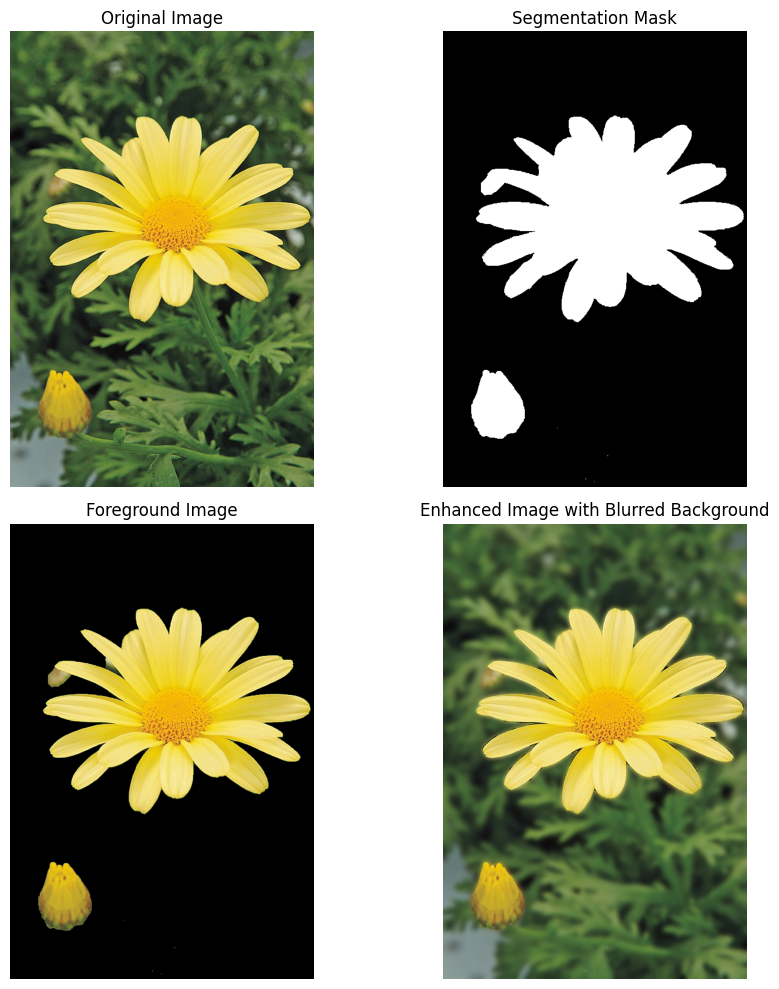


    The background just beyond the edge of the flower appears dark due to a common issue with segmentation 
    algorithms like GrabCut. This happens when pixels near the boundary between foreground and background 
    are partially labeled as 'background' during the segmentation process. As a result, during blurring, 
    these background pixels are blurred along with nearby background pixels, making the boundary darker. 
    The region just beyond the edge of the flower might contain a mix of flower and background pixels, 
    leading to an unnatural transition with dark edges.
    


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Use grabCut to segment the image
def grabcut_segmentation(image_path):
    # Load the image
    img = cv2.imread(image_path)
    mask = np.zeros(img.shape[:2], np.uint8)

    # Define a rectangle around the foreground (flower)
    rect = (50, 50, img.shape[1] - 50, img.shape[0] - 50)

    # Temporary arrays used by the GrabCut algorithm
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Apply GrabCut algorithm
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Convert the mask to binary: foreground (1) and background (0)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Extract the foreground
    foreground = img * mask2[:, :, np.newaxis]
    
    # Extract the background
    background = img * (1 - mask2[:, :, np.newaxis])
    
    return img, mask2, foreground, background

# (b) Produce an enhanced image with a blurred background
def enhance_with_blurred_background(image, foreground, mask):
    # Apply Gaussian blur to the original image for the background
    blurred_background = cv2.GaussianBlur(image, (25, 25), 0)

    # Combine the blurred background with the sharp foreground
    enhanced_image = blurred_background * (1 - mask[:, :, np.newaxis]) + foreground

    return enhanced_image

# (c) Explanation for the dark edge of the background
def explain_dark_edge():
    explanation = """
    The background just beyond the edge of the flower appears dark due to a common issue with segmentation 
    algorithms like GrabCut. This happens when pixels near the boundary between foreground and background 
    are partially labeled as 'background' during the segmentation process. As a result, during blurring, 
    these background pixels are blurred along with nearby background pixels, making the boundary darker. 
    The region just beyond the edge of the flower might contain a mix of flower and background pixels, 
    leading to an unnatural transition with dark edges.
    """
    print(explanation)

# Main function to run the segmentation and enhancement
def main(image_path):
    # Step (a): GrabCut segmentation
    img, mask, foreground, background = grabcut_segmentation(image_path)

    # Step (b): Produce an enhanced image with blurred background
    enhanced_image = enhance_with_blurred_background(img, foreground, mask)

    # Display the original image, segmentation mask, and enhanced image
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Segmentation Mask')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
    plt.title('Foreground Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(enhanced_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image with Blurred Background')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Step (c): Explanation of the dark background edge
    explain_dark_edge()

# Run the main function with the image path
image_path = 'a1images/daisy.jpg'  # Replace with the actual image path
main(image_path)
